Displaying lc solutions 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

arg_date_format = "%d/%m/%y"

# Load CSV file into a DataFrame
df = pd.read_csv('leetcode_solutions.csv', date_format=arg_date_format,parse_dates=['Date'], infer_datetime_format=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_26792\1249961681.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('leetcode_solutions.csv', date_format=arg_date_format,parse_dates=['Date'], infer_datetime_format=True)


C:\Users\PC\AppData\Local\Temp\ipykernel_26792\3583328733.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_success['Time Solved'] = pd.to_timedelta(df_success['Time Solved']).dt.total_seconds()


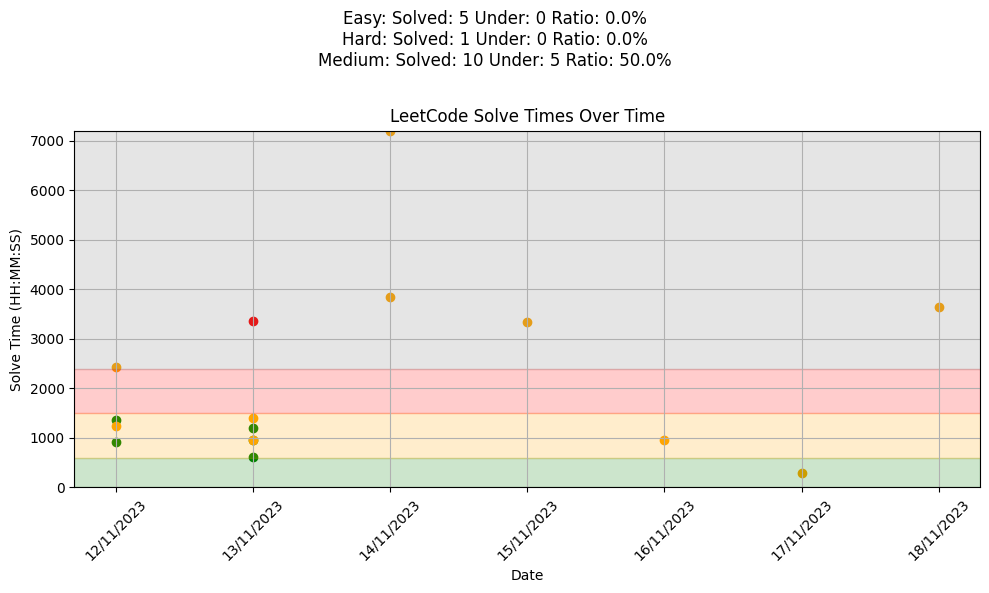

In [5]:
# Filter out rows where the problem was not successfully solved
df_success = df[df['Success'] == 'Yes']

# Convert 'Time Solved' column to timedelta for easier plotting
df_success['Time Solved'] = pd.to_timedelta(df_success['Time Solved']).dt.total_seconds()

# Define target times for each difficulty
target_times = {'Easy': pd.Timedelta(minutes=10).total_seconds(),
                'Medium': pd.Timedelta(minutes=25).total_seconds(),
                'Hard': pd.Timedelta(minutes=40).total_seconds()}
   

# Define colors for each difficulty level
color_dict = {'Easy': 'green', 'Medium': 'orange', 'Hard': 'red'}

# Define target times for each difficulty
solve_count = {'Easy': 0,
                'Medium': 0,
                'Hard': 0}


solve_under = {'Easy': 0,
                'Medium': 0,
                'Hard': 0}


# Plotting
text = ""

plt.figure(figsize=(10, 6))
for difficulty, group in df_success.groupby('Difficulty'):
    plt.scatter(group['Date'], group['Time Solved'], marker='o', linestyle='-', color=color_dict[difficulty], label=difficulty)
    # Add horizontal lines for target times
    unfiltered_df = df_success[(df_success['Difficulty'] == difficulty)]
    solve_count[difficulty] = len(unfiltered_df)

    filtered_df = unfiltered_df[unfiltered_df['Time Solved'] <= target_times[difficulty]]
    solve_under[difficulty] = len(filtered_df)

    text += difficulty+": "
    text+= ("Solved: "+str(solve_count[difficulty])+" Under: "+str(solve_under[difficulty])+" Ratio: "+str((solve_under[difficulty]/solve_count[difficulty])*100)+"%\n")
    #secTime = target_times[difficulty].total_seconds()

plt.axhspan(0,target_times['Easy'],color=color_dict['Easy'],alpha=0.2)
plt.axhspan(target_times['Easy'],target_times['Medium'],color=color_dict['Medium'],alpha=0.2)
plt.axhspan(target_times['Medium'],target_times['Hard'],color=color_dict['Hard'],alpha=0.2)
plt.axhspan(target_times['Hard'],ymax=df_success['Time Solved'].max(),color='gray',alpha=0.2)

#plt.axhline(secTime, color=color_dict[difficulty], linestyle='--', linewidth=1)
    
# Formatting the plot

plt.title('LeetCode Solve Times Over Time')
plt.suptitle(text)
plt.xlabel('Date')
plt.ylabel('Solve Time (HH:MM:SS)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
ax = plt.gca()
ax.set_ylim([0, df_success['Time Solved'].max()])

curr_img = plt.gcf()
#save
curr_img.savefig('leetcode_solutions.png')


# Show plot
plt.show()
